In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import calendar
from scipy import stats


In [2]:
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Custom color palettes for visualizations
month_colors = {
    'January': '#1f77b4', 'February': '#ff7f0e', 'March': '#2ca02c', 'April': '#d62728',
    'May': '#9467bd', 'June': '#8c564b', 'July': '#e377c2', 'August': '#7f7f7f',
    'September': '#bcbd22', 'October': '#17becf', 'November': '#aec7e8', 'December': '#ffbb78'
}


In [3]:
df_ffa = pd.read_csv("Month Wise FFA.csv")
df_ffe = pd.read_csv("Month Wise FFE Dollar.csv")
df_ffe

,year,january,february,march,april,may,june,july,augest,september,october,november,december
0,2014,1.880,1.849,1.716,1.520,1.337,1.470,1.712,1.706,1.488,1.636,1.853,2.069
1,2015,1.945,1.877,1.783,1.609,1.491,1.498,1.884,1.752,1.573,1.621,1.912,2.126
2,2016,2.032,2.001,1.938,1.726,1.726,1.587,2.125,1.875,1.744,1.812,2.110,2.439
3,2017,2.320,2.289,2.224,2.211,1.901,2.013,2.295,2.158,2.149,2.183,2.549,3.018
4,2018,2.791,2.760,2.648,2.379,1.889,2.125,2.468,2.370,2.101,1.998,1.998,2.755
5,2019,2.575,2.521,2.331,2.466,1.983,2.316,2.646,2.504,2.359,2.401,2.777,3.179
6,2020,2.833,2.551,0.784,0.009,0.012,0.027,0.041,0.064,0.094,0.013,0.190,0.241


In [4]:
df_ffa['year'] = df_ffa['year'].astype(int)
df_ffe['year'] = df_ffe['year'].astype(int)

In [5]:
df_ffa.set_index('year', inplace=True)
df_ffe.set_index('year', inplace=True)

In [6]:
if 'augest' in df_ffe.columns:
    df_ffe.rename(columns={'augest': 'august'}, inplace=True)

In [7]:
df_ffa_renamed = df_ffa.add_prefix('ffa_')
df_ffe_renamed = df_ffe.add_prefix('ffe_')

In [10]:
df_combined = pd.concat([df_ffa_renamed, df_ffe_renamed], axis=1)
df_combined.to_csv("Monthly Wise FFA FFE.csv")
df_combined

,ffa_january,ffa_february,ffa_march,ffa_april,ffa_may,ffa_june,ffa_july,ffa_august,ffa_september,ffa_october,...,ffe_march,ffe_april,ffe_may,ffe_june,ffe_july,ffe_august,ffe_september,ffe_october,ffe_november,ffe_december
year,,,,,,,,,,,,,,,,,,,,,
2014,757786.0,755678.0,690441.0,535321.0,465043.0,502028.0,568871.0,575750.0,509142.0,668398.0,...,1.716,1.520,1.337,1.470,1.712,1.706,1.488,1.636,1.853,2.069
2015,790854.0,761007.0,729154.0,541551.0,509869.0,512341.0,628323.0,599478.0,542600.0,683286.0,...,1.783,1.609,1.491,1.498,1.884,1.752,1.573,1.621,1.912,2.126
2016,844533.0,848782.0,809107.0,592004.0,527466.0,546972.0,733834.0,652111.0,608177.0,741770.0,...,1.938,1.726,1.726,1.587,2.125,1.875,1.744,1.812,2.110,2.439
2017,964109.0,931025.0,885936.0,717899.0,622408.0,663470.0,779309.0,779309.0,719964.0,866976.0,...,2.224,2.211,1.901,2.013,2.295,2.158,2.149,2.183,2.549,3.018
2018,1045027.0,1045028.0,1045029.0,1045030.0,1045031.0,1045032.0,1045033.0,1045034.0,1045035.0,1045036.0,...,2.648,2.379,1.889,2.125,2.468,2.370,2.101,1.998,1.998,2.755
2019,1111040.0,1090516.0,978236.0,774651.0,615136.0,726446.0,818125.0,800837.0,751513.0,945017.0,...,2.331,2.466,1.983,2.316,2.646,2.504,2.359,2.401,2.777,3.179
2020,1119250.0,1119250.0,328304.0,2820.0,3764.0,8590.0,12655.0,19761.0,28167.0,41494.0,...,0.784,0.009,0.012,0.027,0.041,0.064,0.094,0.013,0.190,0.241


In [11]:
df_ffa_long = df_ffa.reset_index().melt(
    id_vars=['year'],
    value_vars=[col for col in df_ffa.columns],
    var_name='month',
    value_name='tourist_arrivals'
)

# Reshape FFE data
df_ffe_long = df_ffe.reset_index().melt(
    id_vars=['year'],
    value_vars=[col for col in df_ffe.columns],
    var_name='month',
    value_name='exchange_earnings'
)

df_ffa_long

,year,month,tourist_arrivals
0,2014,january,757786.0
1,2015,january,790854.0
2,2016,january,844533.0
3,2017,january,964109.0
4,2018,january,1045027.0
...,...,...,...
79,2016,december,1021375.0
80,2017,december,1167840.0
81,2018,december,1045038.0
82,2019,december,1226398.0


In [12]:
df_long = pd.merge(df_ffa_long, df_ffe_long, on=['year', 'month'])

# Convert month names to title case
df_long['month'] = df_long['month'].str.title()
df_long

,year,month,tourist_arrivals,exchange_earnings
0,2014,January,757786.0,1.880
1,2015,January,790854.0,1.945
2,2016,January,844533.0,2.032
3,2017,January,964109.0,2.320
4,2018,January,1045027.0,2.791
...,...,...,...,...
79,2016,December,1021375.0,2.439
80,2017,December,1167840.0,3.018
81,2018,December,1045038.0,2.755
82,2019,December,1226398.0,3.179


In [13]:
month_to_num = {month: i+1 for i, month in enumerate(calendar.month_name[1:])}
df_long['month_num'] = df_long['month'].map(month_to_num)

# Sort by year and month_num
df_long = df_long.sort_values(['year', 'month_num'])
df_long

,year,month,tourist_arrivals,exchange_earnings,month_num
0,2014,January,757786.0,1.880,1
7,2014,February,755678.0,1.849,2
14,2014,March,690441.0,1.716,3
21,2014,April,535321.0,1.520,4
28,2014,May,465043.0,1.337,5
...,...,...,...,...,...
55,2020,August,19761.0,0.064,8
62,2020,September,28167.0,0.094,9
69,2020,October,41494.0,0.013,10
76,2020,November,70977.0,0.190,11


In [15]:
# Create a date column for time series analysis
df_long['date'] = pd.to_datetime(df_long['year'].astype(str) + '-' + df_long['month_num'].astype(str) + '-01')

# Add a quarter column
df_long['quarter'] = df_long['month_num'].apply(lambda x: (x-1)//3 + 1)
df_long['quarter_label'] = 'Q' + df_long['quarter'].astype(str)

# Add a season column
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df_long['season'] = df_long['month_num'].map(season_map)

# Add a period column (pre-COVID vs COVID)
df_long['period'] = 'Pre-COVID'
df_long.loc[df_long['year'] == 2020, 'period'] = 'COVID'
df_long.to_csv("Monthly Wise FFA FFE - processed.csv")
df_long

,year,month,tourist_arrivals,exchange_earnings,month_num,date,quarter,quarter_label,season,period
0,2014,January,757786.0,1.880,1,2014-01-01,1,Q1,Winter,Pre-COVID
7,2014,February,755678.0,1.849,2,2014-02-01,1,Q1,Winter,Pre-COVID
14,2014,March,690441.0,1.716,3,2014-03-01,1,Q1,Spring,Pre-COVID
21,2014,April,535321.0,1.520,4,2014-04-01,2,Q2,Spring,Pre-COVID
28,2014,May,465043.0,1.337,5,2014-05-01,2,Q2,Spring,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...
55,2020,August,19761.0,0.064,8,2020-08-01,3,Q3,Summer,COVID
62,2020,September,28167.0,0.094,9,2020-09-01,3,Q3,Fall,COVID
69,2020,October,41494.0,0.013,10,2020-10-01,4,Q4,Fall,COVID
76,2020,November,70977.0,0.190,11,2020-11-01,4,Q4,Fall,COVID


In [16]:
print("=" * 50)
print("MONTHLY TOURISM DATA: EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Basic information about the dataset
print("\n1. Dataset Overview:")
print(f"Time period: {df_long['year'].min()} to {df_long['year'].max()}")
print(f"Total months of data: {len(df_long)}")

# Monthly averages across all years
print("\n2. Average monthly tourist arrivals (across all years):")
monthly_avg = df_long.groupby('month')['tourist_arrivals'].mean().sort_values(ascending=False)
for month, avg in monthly_avg.items():
    print(f"{month}: {avg:,.0f}")

# Calculate peak and low seasons
peak_month = monthly_avg.idxmax()
low_month = monthly_avg.idxmin()

print(f"\nPeak month: {peak_month} with average {monthly_avg.max():,.0f} tourists")
print(f"Low month: {low_month} with average {monthly_avg.min():,.0f} tourists")

# Seasonal analysis
print("\n3. Seasonal analysis:")
seasonal_avg = df_long.groupby('season')['tourist_arrivals'].mean().sort_values(ascending=False)
for season, avg in seasonal_avg.items():
    print(f"{season}: {avg:,.0f}")

# Quarterly analysis
print("\n4. Quarterly analysis:")
quarterly_avg = df_long.groupby('quarter_label')['tourist_arrivals'].mean().sort_values(ascending=False)
for quarter, avg in quarterly_avg.items():
    print(f"{quarter}: {avg:,.0f}")

# Year-over-year growth rates by month
print("\n5. Year-over-year growth rates for key months:")

# Select a few key months (peak, middle, low)
key_months = [peak_month, 'June', low_month]

for month in key_months:
    print(f"\n{month} year-over-year growth rates:")
    month_data = df_long[df_long['month'] == month].sort_values('year')
    
    prev_year = None
    prev_arrivals = None
    
    for i, row in month_data.iterrows():
        year = row['year']
        arrivals = row['tourist_arrivals']
        
        if prev_year is not None:
            growth_rate = ((arrivals / prev_arrivals) - 1) * 100
            print(f"{prev_year} to {year}: {growth_rate:.2f}%")
        
        prev_year = year
        prev_arrivals = arrivals

# COVID-19 impact analysis
if 2020 in df_long['year'].unique() and 2019 in df_long['year'].unique():
    print("\n6. COVID-19 Impact Analysis (2019 vs 2020):")
    
    # Get monthly data for 2019 and 2020
    df_2019 = df_long[df_long['year'] == 2019].sort_values('month_num')
    df_2020 = df_long[df_long['year'] == 2020].sort_values('month_num')
    
    # Create a comparison dataframe
    comparison = pd.merge(
        df_2019[['month', 'tourist_arrivals', 'exchange_earnings']],
        df_2020[['month', 'tourist_arrivals', 'exchange_earnings']],
        on='month',
        suffixes=('_2019', '_2020')
    )
    
    # Calculate percentage changes
    comparison['arrivals_pct_change'] = ((comparison['tourist_arrivals_2020'] / comparison['tourist_arrivals_2019']) - 1) * 100
    comparison['earnings_pct_change'] = ((comparison['exchange_earnings_2020'] / comparison['exchange_earnings_2019']) - 1) * 100
    
    print("Monthly percentage changes in tourist arrivals (2019 to 2020):")
    for i, row in comparison.iterrows():
        print(f"{row['month']}: {row['arrivals_pct_change']:.2f}%")
    
    print("\nMonthly percentage changes in exchange earnings (2019 to 2020):")
    for i, row in comparison.iterrows():
        print(f"{row['month']}: {row['earnings_pct_change']:.2f}%")

# Correlation between arrivals and earnings
correlation = df_long['tourist_arrivals'].corr(df_long['exchange_earnings'])
print(f"\n7. Correlation between tourist arrivals and exchange earnings: {correlation:.4f}")

# Create analysis results dictionary
analysis_results = {
    'monthly_avg': monthly_avg,
    'seasonal_avg': seasonal_avg,
    'quarterly_avg': quarterly_avg,
    'peak_month': peak_month,
    'low_month': low_month,
    'correlation': correlation
}

MONTHLY TOURISM DATA: EXPLORATORY DATA ANALYSIS

1. Dataset Overview:
Time period: 2014 to 2020
Total months of data: 84

2. Average monthly tourist arrivals (across all years):
January: 947,514
February: 935,898
December: 907,009
November: 809,417
March: 780,887
October: 713,140
July: 655,164
August: 638,897
April: 601,325
September: 600,657
June: 572,126
May: 541,245

Peak month: January with average 947,514 tourists
Low month: May with average 541,245 tourists

3. Seasonal analysis:
Winter: 930,140
Fall: 707,738
Spring: 641,152
Summer: 622,062

4. Quarterly analysis:
Q1: 888,100
Q4: 809,855
Q3: 631,573
Q2: 571,565

5. Year-over-year growth rates for key months:

January year-over-year growth rates:
2014 to 2015: 4.36%
2015 to 2016: 6.79%
2016 to 2017: 14.16%
2017 to 2018: 8.39%
2018 to 2019: 6.32%
2019 to 2020: 0.74%

June year-over-year growth rates:
2014 to 2015: 2.05%
2015 to 2016: 6.76%
2016 to 2017: 21.30%
2017 to 2018: 57.51%
2018 to 2019: -30.49%
2019 to 2020: -98.82%

May ye

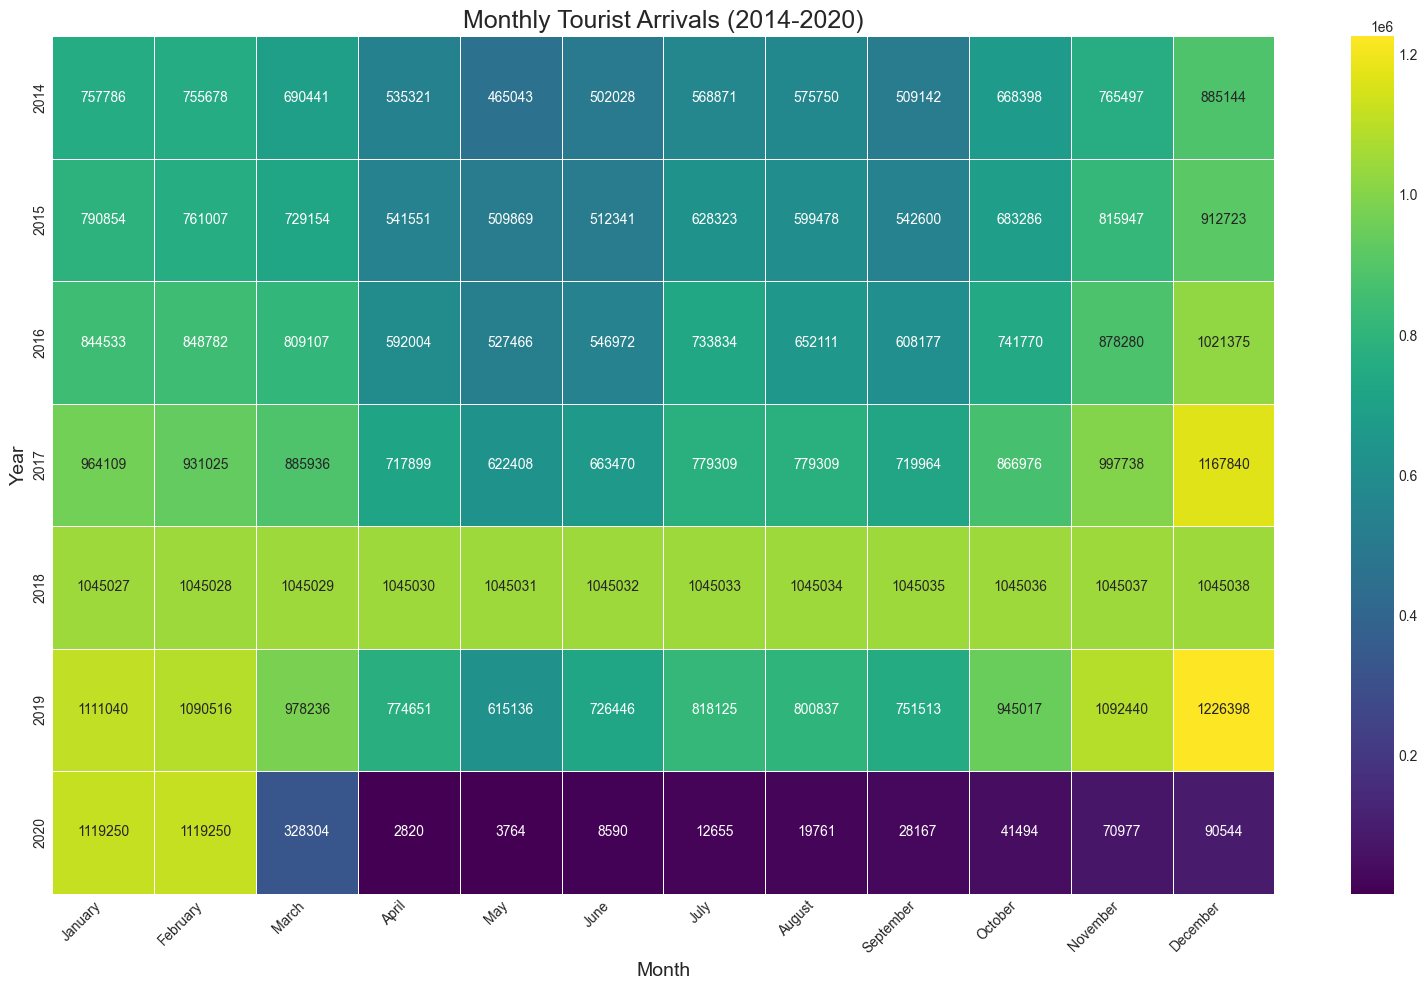

In [17]:
# 1. Monthly Tourist Arrivals Trends
plt.figure(figsize=(16, 10))

# Create a pivot table for heatmap
heatmap_data = df_long.pivot_table(index='year', columns='month', values='tourist_arrivals')

# Reorder columns by month
months_ordered = [calendar.month_name[i] for i in range(1, 13)]
months_ordered = [m for m in months_ordered if m.lower() in [col.lower() for col in heatmap_data.columns]]
heatmap_data = heatmap_data[months_ordered]

# Create heatmap
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)

plt.title('Monthly Tourist Arrivals (2014-2020)', fontsize=18)
plt.ylabel('Year', fontsize=14)
plt.xlabel('Month', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

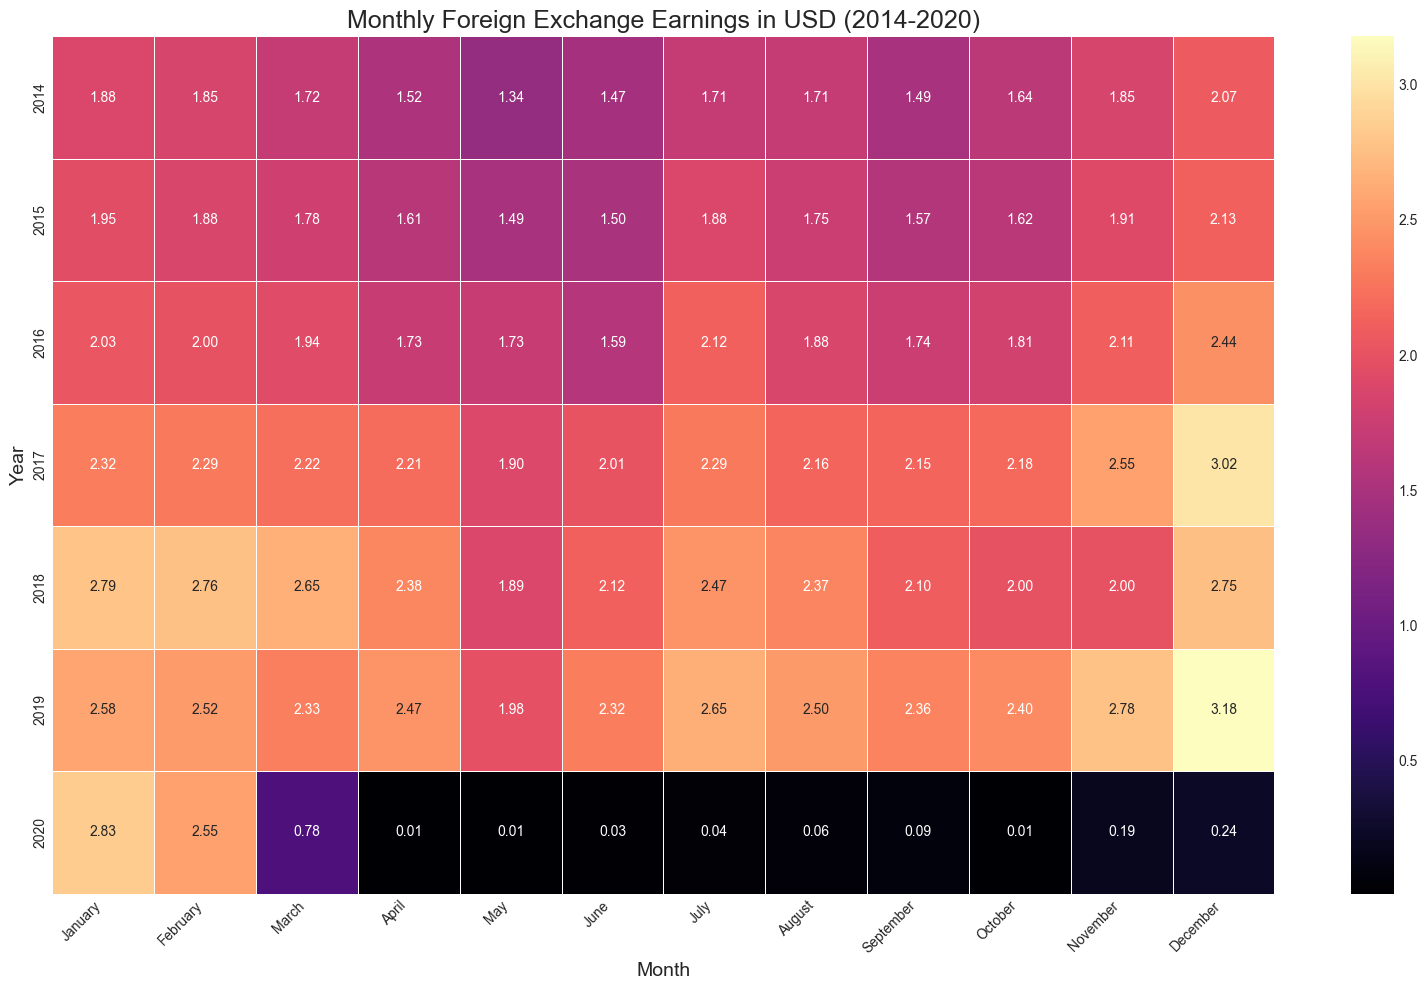

In [18]:
plt.figure(figsize=(16, 10))

# Create a pivot table for heatmap
heatmap_data = df_long.pivot_table(index='year', columns='month', values='exchange_earnings')

# Reorder columns by month
heatmap_data = heatmap_data[months_ordered]

# Create heatmap
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.2f', linewidths=.5)

plt.title('Monthly Foreign Exchange Earnings in USD (2014-2020)', fontsize=18)
plt.ylabel('Year', fontsize=14)
plt.xlabel('Month', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

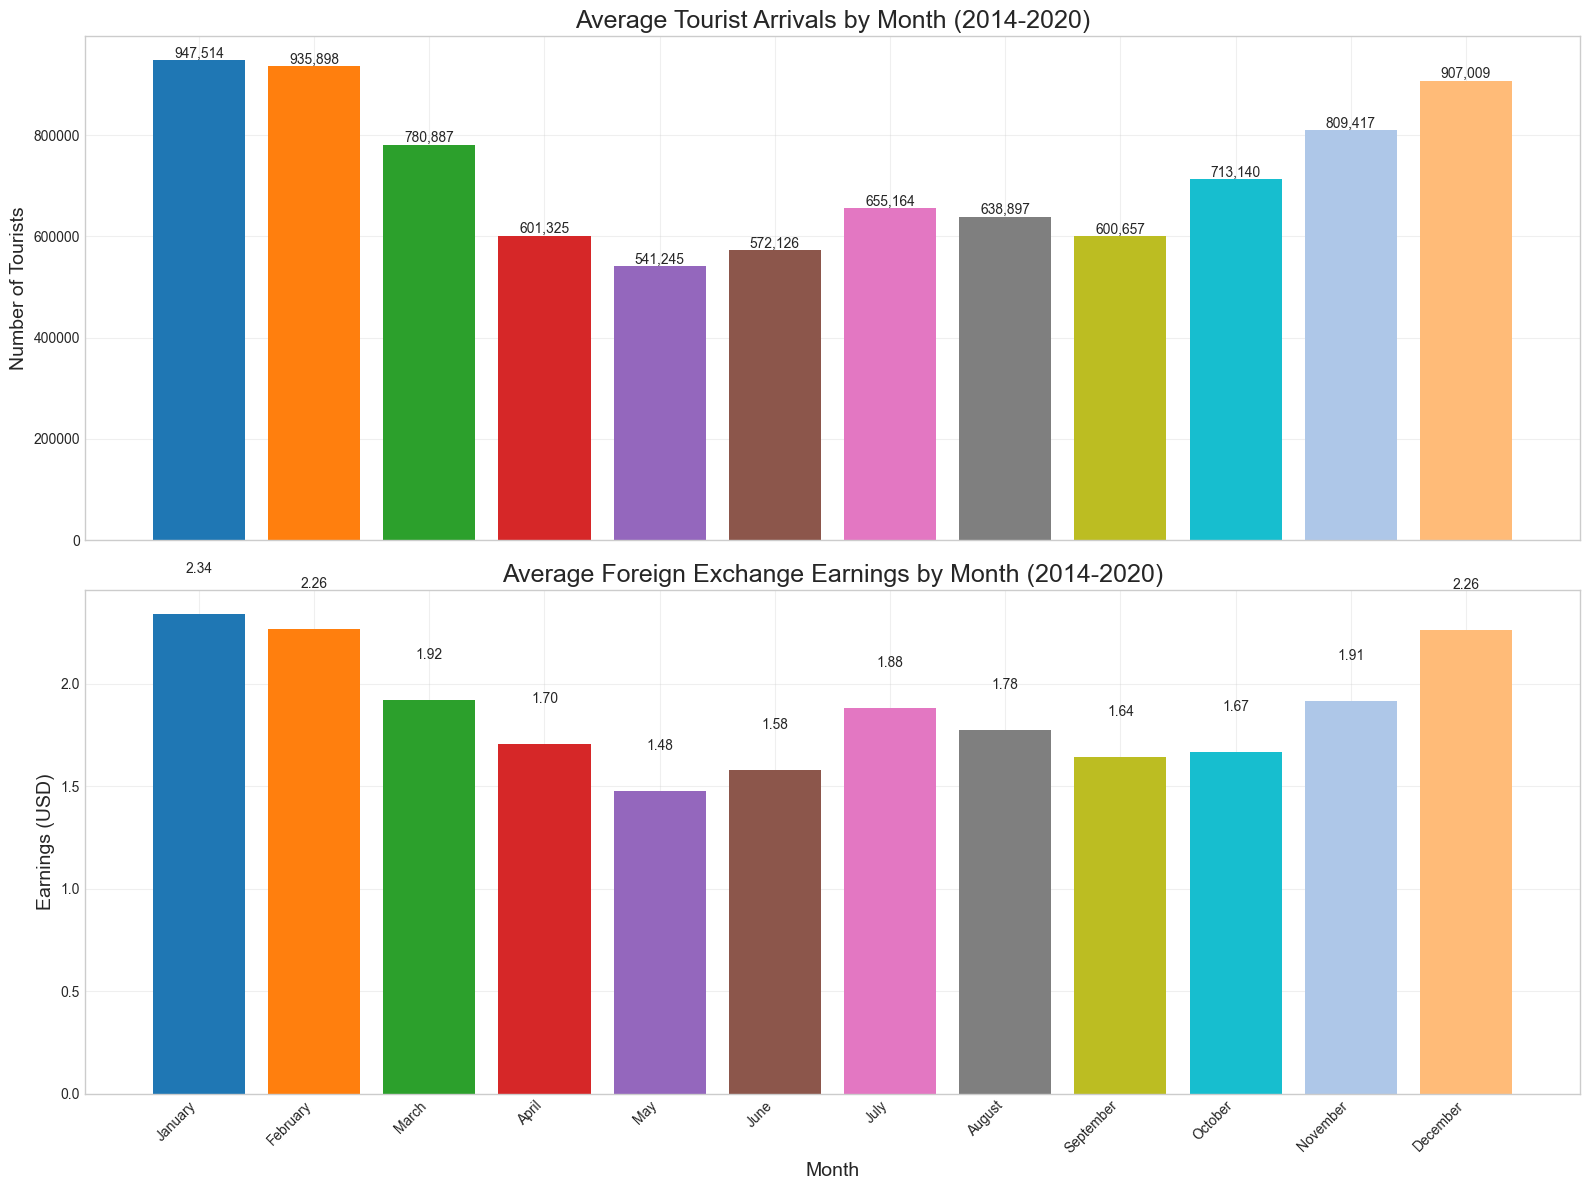

In [19]:
plt.figure(figsize=(16, 8))

# Group by month and calculate average
monthly_pattern = df_long.groupby('month_num').agg({
    'tourist_arrivals': 'mean',
    'exchange_earnings': 'mean'
}).reset_index()

# Add month names
monthly_pattern['month'] = monthly_pattern['month_num'].apply(lambda x: calendar.month_name[x])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Plot average tourist arrivals by month
ax1.bar(monthly_pattern['month'], monthly_pattern['tourist_arrivals'], 
        color=[month_colors.get(month, '#1f77b4') for month in monthly_pattern['month']])

ax1.set_title('Average Tourist Arrivals by Month (2014-2020)', fontsize=18)
ax1.set_ylabel('Number of Tourists', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add data labels
for i, v in enumerate(monthly_pattern['tourist_arrivals']):
    ax1.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10)

# Plot average exchange earnings by month
ax2.bar(monthly_pattern['month'], monthly_pattern['exchange_earnings'], 
        color=[month_colors.get(month, '#1f77b4') for month in monthly_pattern['month']])

ax2.set_title('Average Foreign Exchange Earnings by Month (2014-2020)', fontsize=18)
ax2.set_xlabel('Month', fontsize=14)
ax2.set_ylabel('Earnings (USD)', fontsize=14)
ax2.grid(True, alpha=0.3)

# Add data labels
for i, v in enumerate(monthly_pattern['exchange_earnings']):
    ax2.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

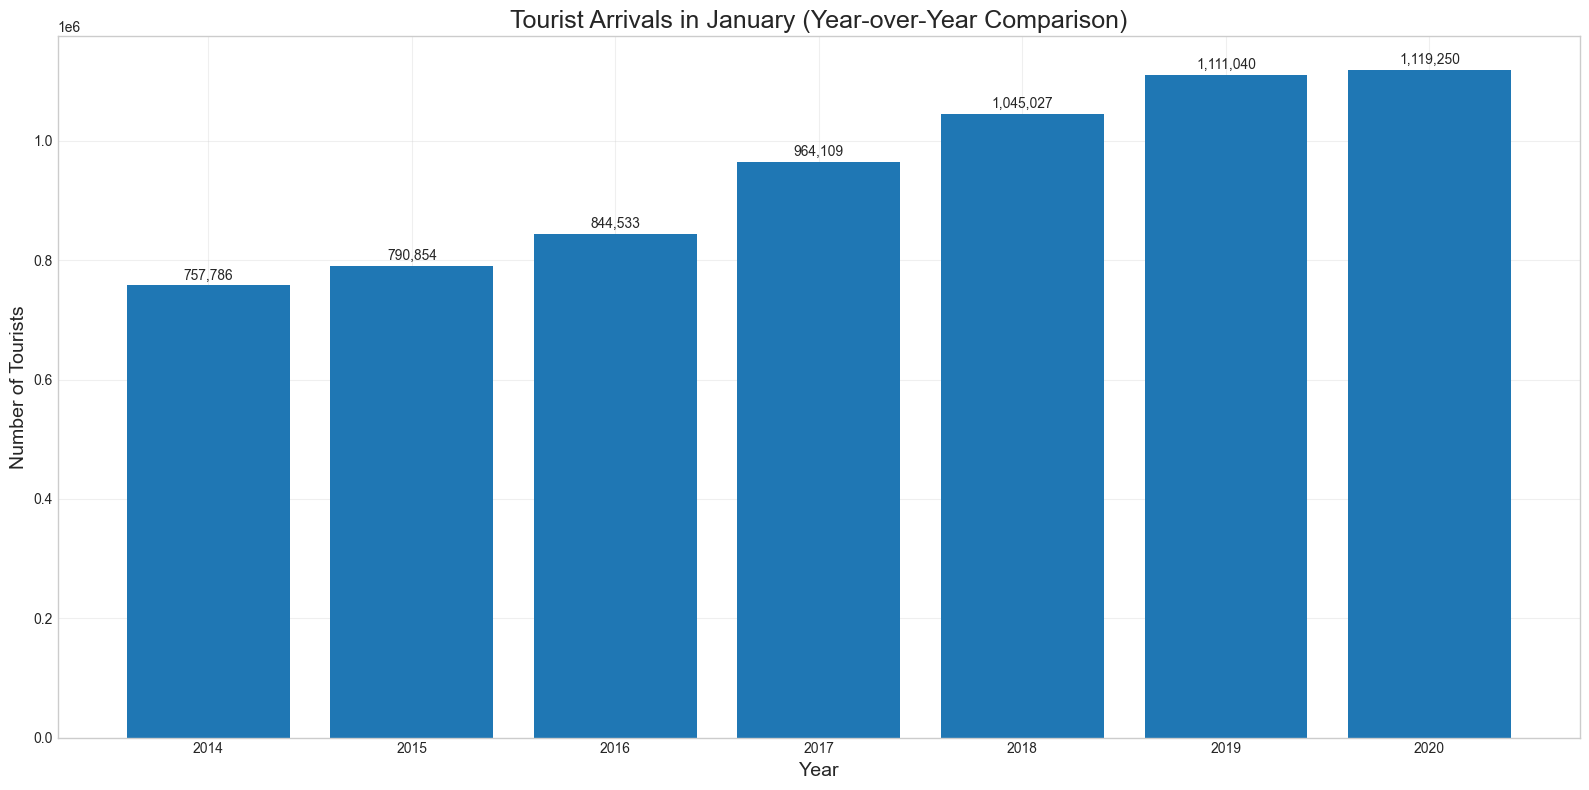

In [20]:
peak_month = analysis_results['peak_month']

plt.figure(figsize=(16, 8))

# Filter data for the peak month
peak_data = df_long[df_long['month'] == peak_month].sort_values('year')

# Create bar chart for tourist arrivals
plt.bar(peak_data['year'], peak_data['tourist_arrivals'], color='#1f77b4')

plt.title(f'Tourist Arrivals in {peak_month} (Year-over-Year Comparison)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tourists', fontsize=14)
plt.grid(True, alpha=0.3)

# Add data labels
for i, row in peak_data.iterrows():
    plt.text(row['year'], row['tourist_arrivals'] + 10000, f'{row["tourist_arrivals"]:,.0f}', 
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

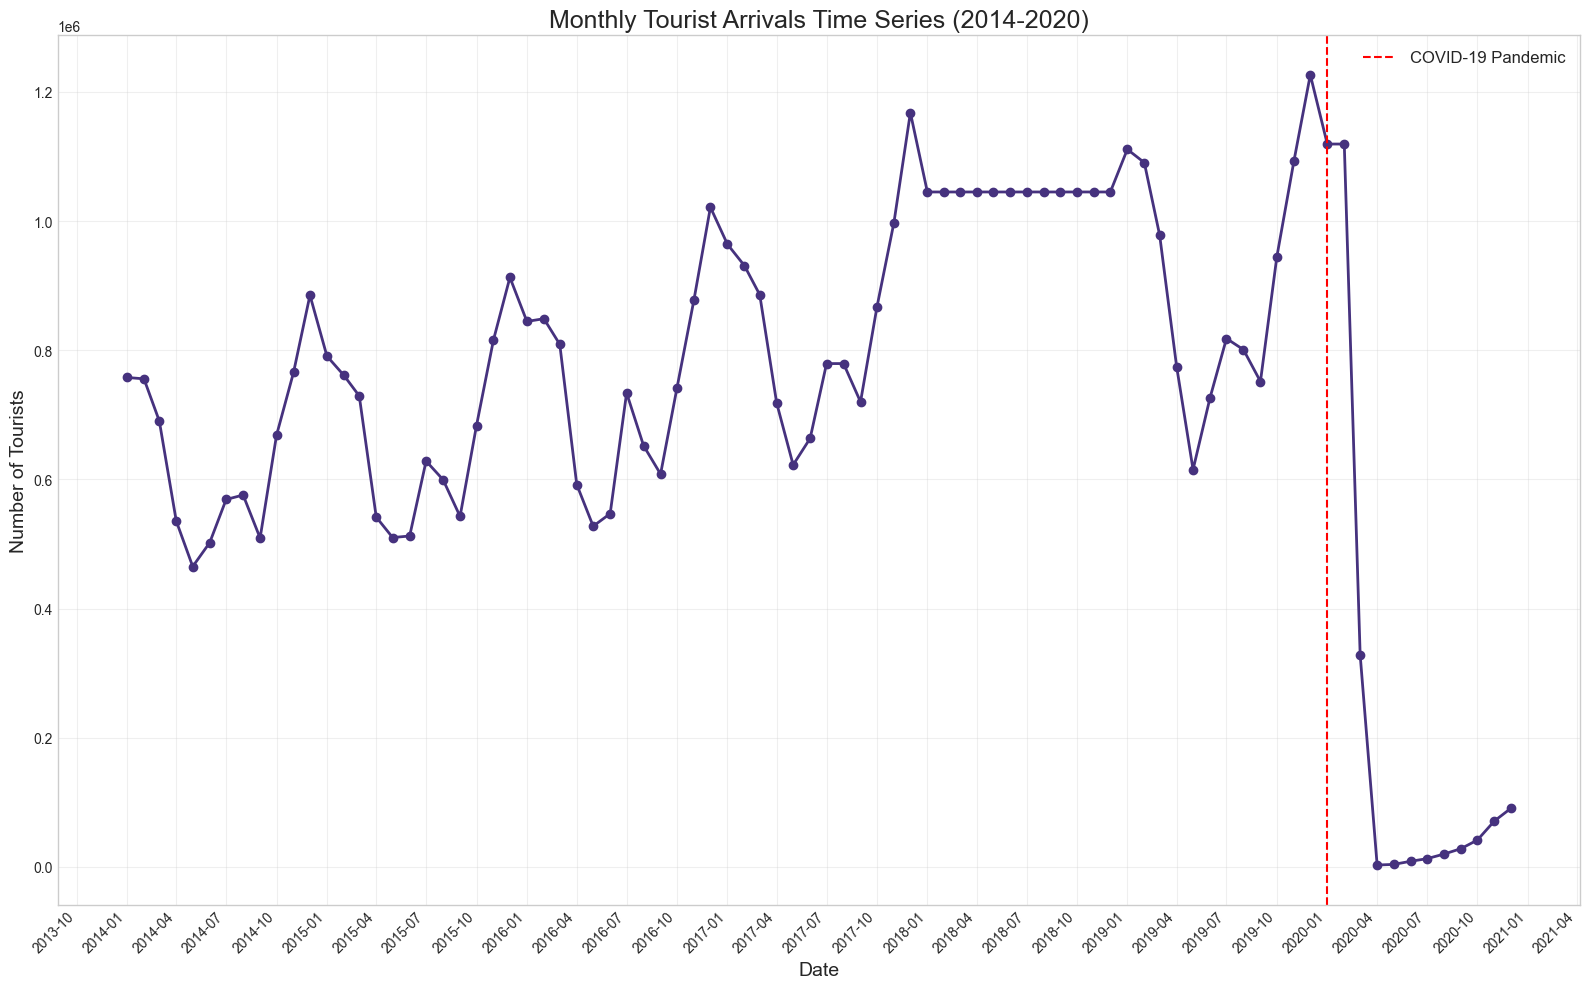

In [21]:
plt.figure(figsize=(16, 10))

# Sort data by date
time_series_data = df_long.sort_values('date')

# Plot the time series
plt.plot(time_series_data['date'], time_series_data['tourist_arrivals'], marker='o', linestyle='-', linewidth=2)

plt.title('Monthly Tourist Arrivals Time Series (2014-2020)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tourists', fontsize=14)
plt.grid(True, alpha=0.3)

# Format the x-axis to show years and months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Add a vertical line to mark the start of 2020 (COVID-19)
if 2020 in df_long['year'].unique():
    plt.axvline(x=pd.to_datetime('2020-01-01'), color='r', linestyle='--', 
                label='COVID-19 Pandemic')
    plt.legend(fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

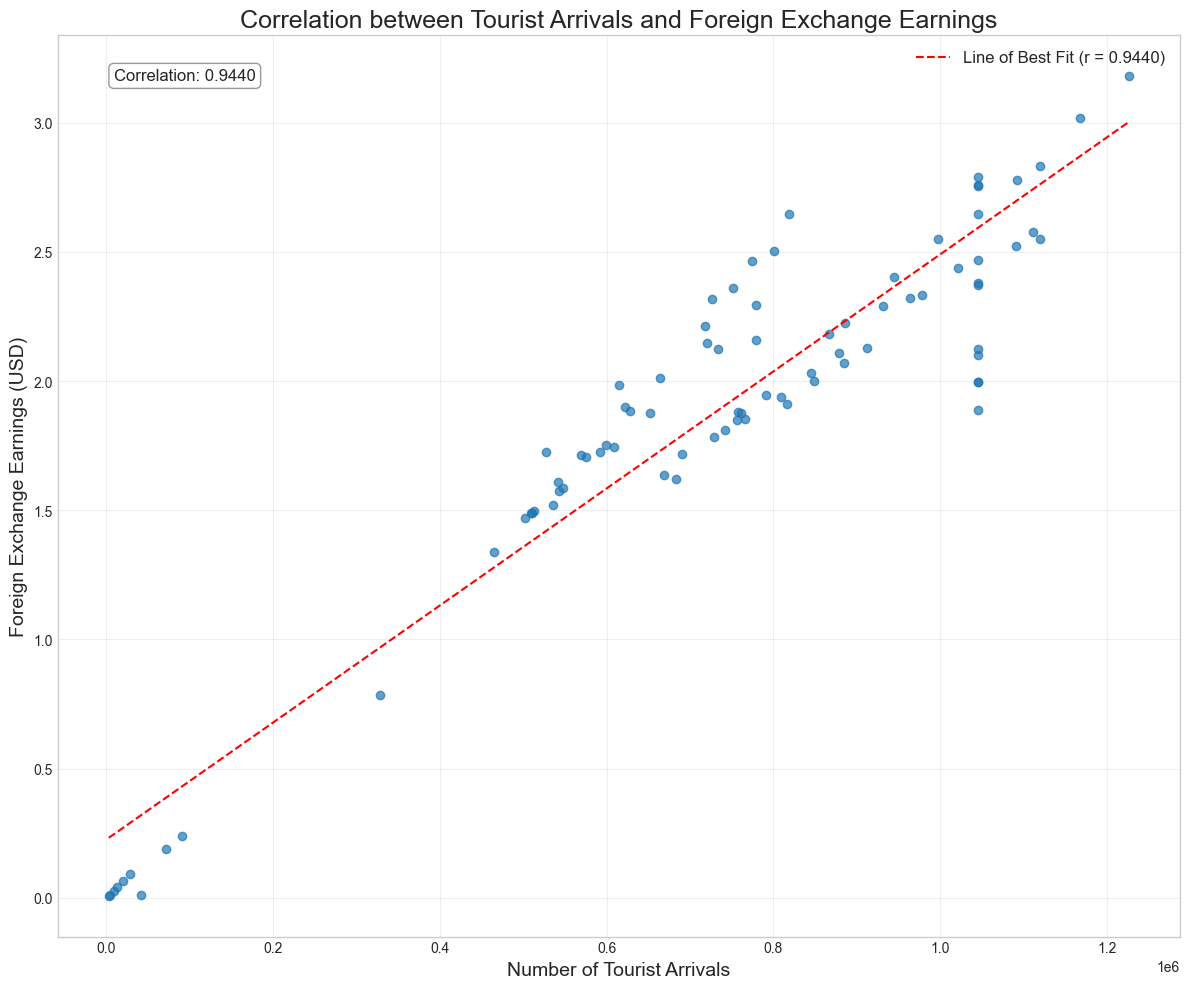

In [22]:
plt.figure(figsize=(12, 10))

# Create a scatter plot
plt.scatter(df_long['tourist_arrivals'], df_long['exchange_earnings'], 
            alpha=0.7, color='#1f77b4')

# Add a best fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_long['tourist_arrivals'], df_long['exchange_earnings'])

x = np.array([df_long['tourist_arrivals'].min(), df_long['tourist_arrivals'].max()])
y = intercept + slope * x

plt.plot(x, y, color='r', linestyle='--', 
        label=f'Line of Best Fit (r = {r_value:.4f})')

plt.title('Correlation between Tourist Arrivals and Foreign Exchange Earnings', fontsize=18)
plt.xlabel('Number of Tourist Arrivals', fontsize=14)
plt.ylabel('Foreign Exchange Earnings (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add text annotation with correlation value
plt.annotate(f"Correlation: {analysis_results['correlation']:.4f}", 
            xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

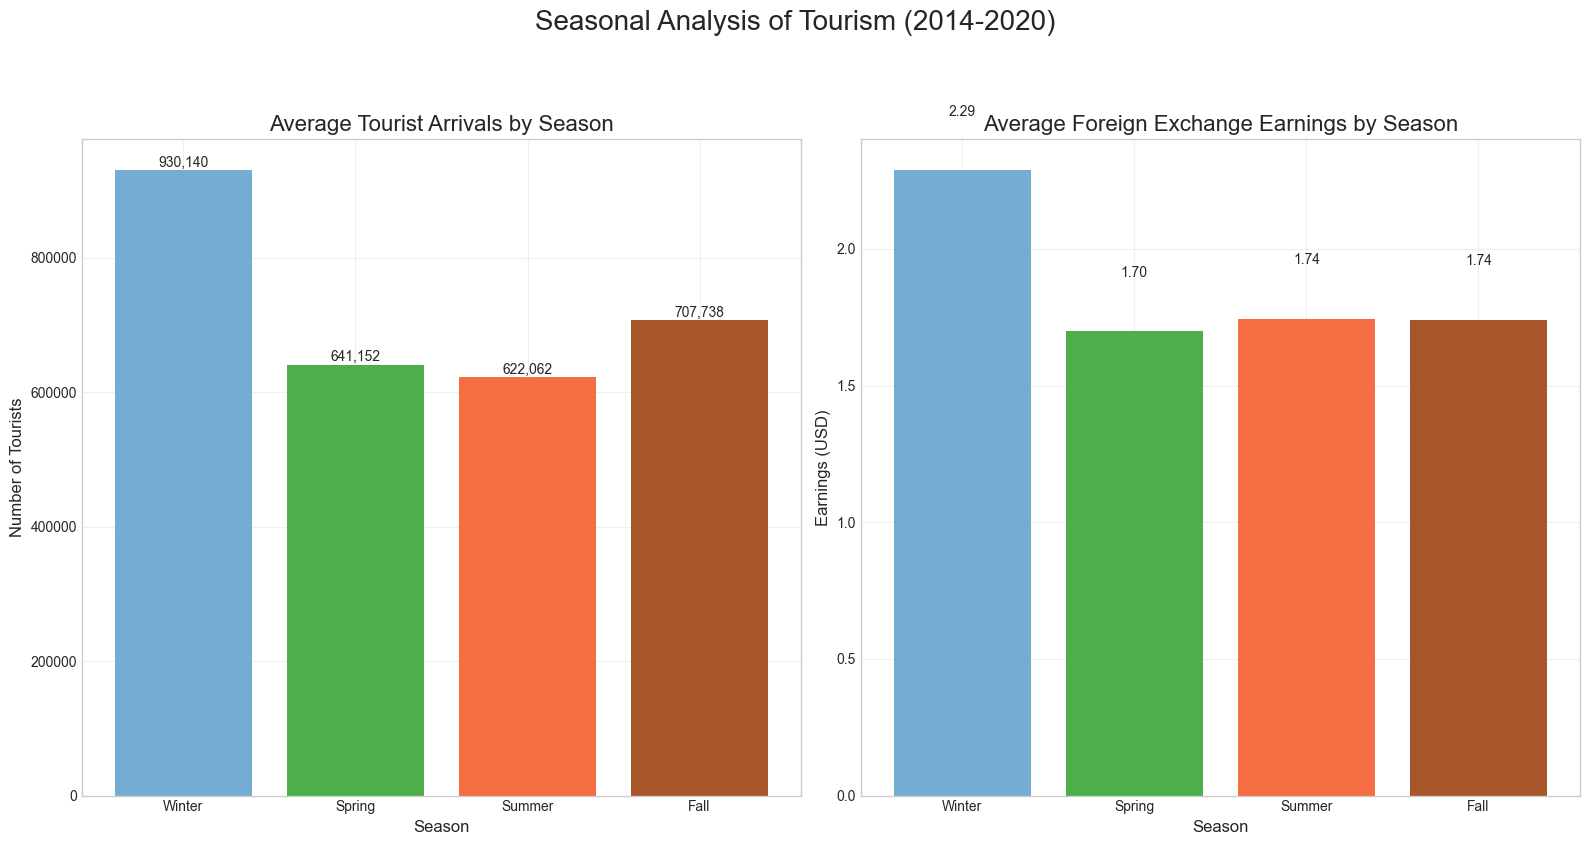

In [23]:
plt.figure(figsize=(14, 8))

# Group by season
seasonal_data = df_long.groupby('season').agg({
    'tourist_arrivals': 'mean',
    'exchange_earnings': 'mean'
}).reset_index()

# Define the order of seasons
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_data['season'] = pd.Categorical(seasonal_data['season'], categories=season_order, ordered=True)
seasonal_data = seasonal_data.sort_values('season')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Season colors
season_colors = {'Winter': '#74add1', 'Spring': '#4daf4a', 'Summer': '#f46d43', 'Fall': '#a65628'}

# Plot seasonal tourist arrivals
ax1.bar(seasonal_data['season'], seasonal_data['tourist_arrivals'],
        color=[season_colors[season] for season in seasonal_data['season']])

ax1.set_title('Average Tourist Arrivals by Season', fontsize=16)
ax1.set_xlabel('Season', fontsize=12)
ax1.set_ylabel('Number of Tourists', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add data labels
for i, v in enumerate(seasonal_data['tourist_arrivals']):
    ax1.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10)

# Plot seasonal exchange earnings
ax2.bar(seasonal_data['season'], seasonal_data['exchange_earnings'],
        color=[season_colors[season] for season in seasonal_data['season']])

ax2.set_title('Average Foreign Exchange Earnings by Season', fontsize=16)
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Earnings (USD)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add data labels
for i, v in enumerate(seasonal_data['exchange_earnings']):
    ax2.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10)

plt.suptitle('Seasonal Analysis of Tourism (2014-2020)', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

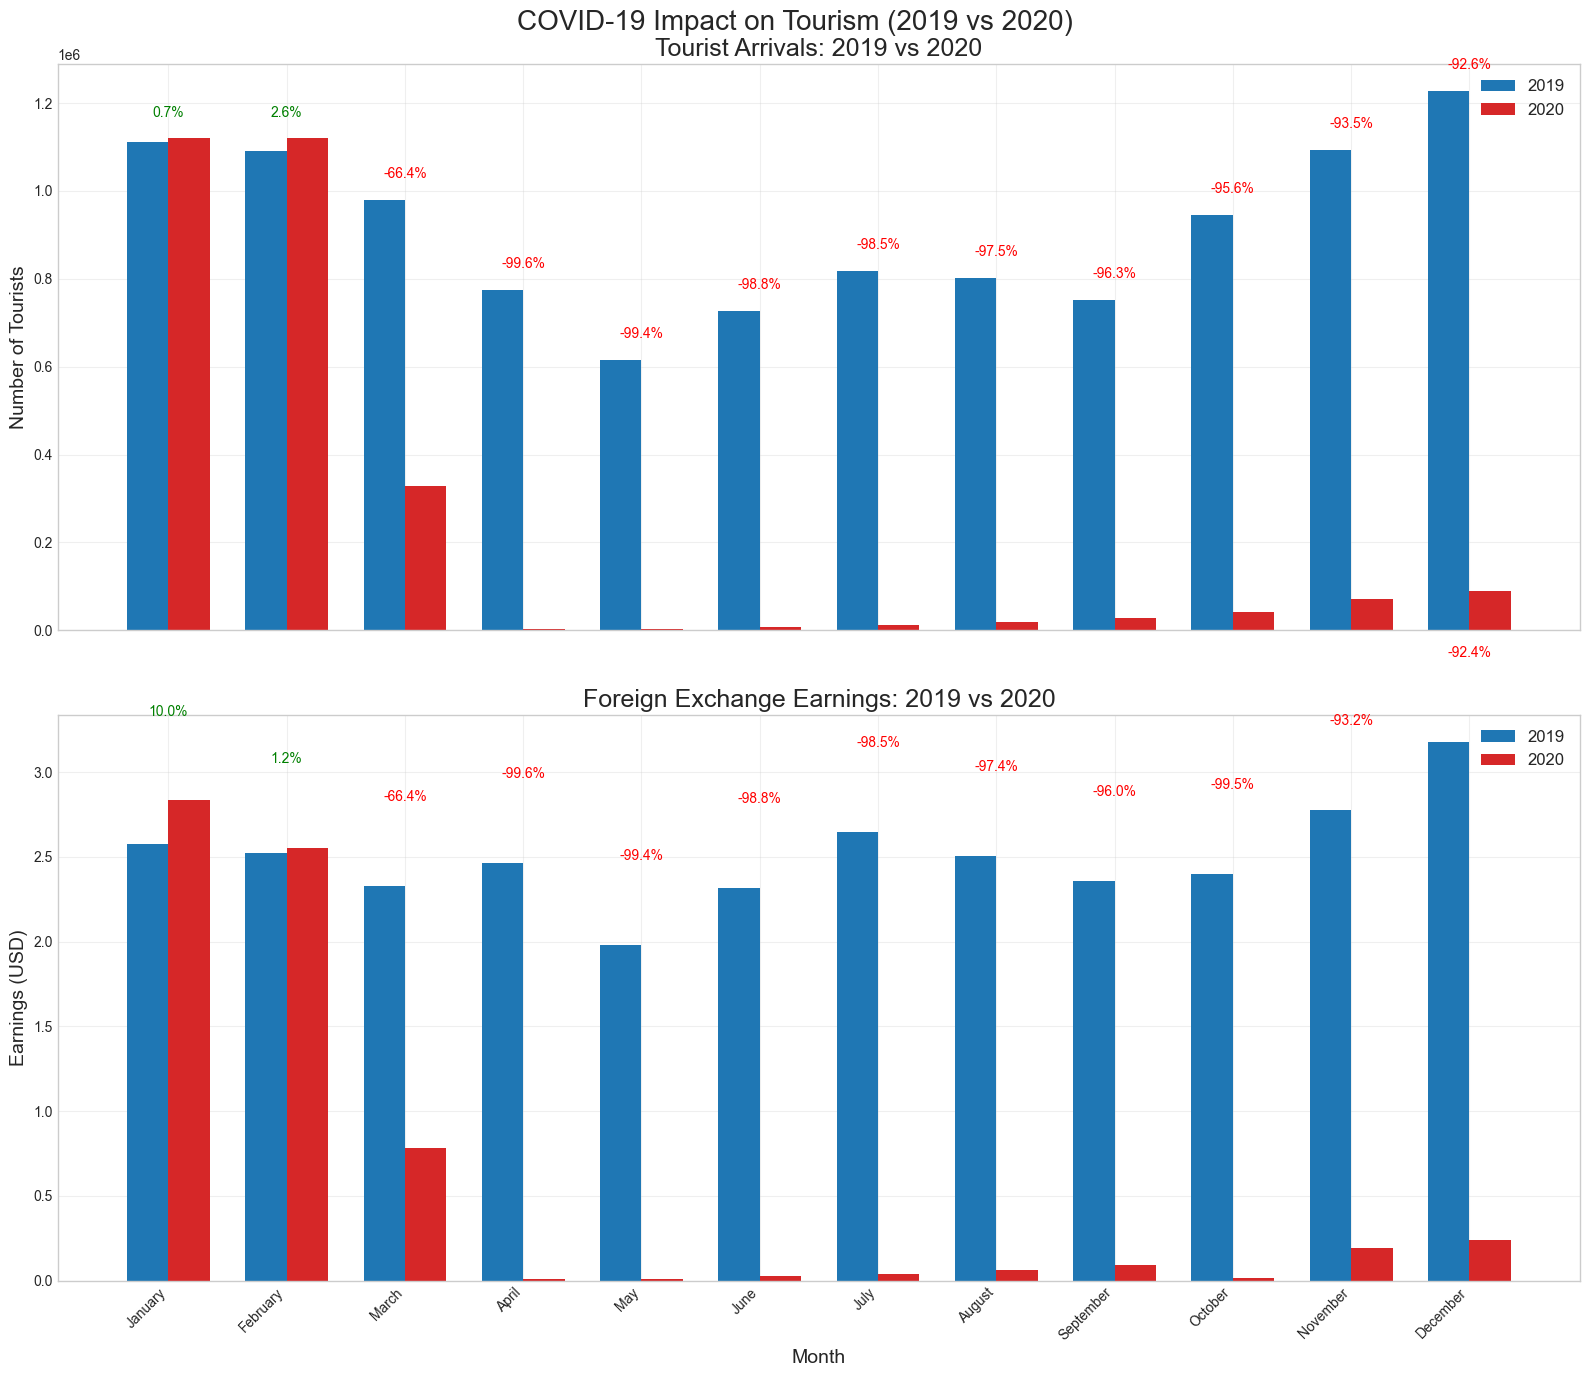

In [24]:
if 2020 in df_long['year'].unique() and 2019 in df_long['year'].unique():
    plt.figure(figsize=(16, 10))
    
    # Get data for 2019 and 2020
    df_2019 = df_long[df_long['year'] == 2019].sort_values('month_num')
    df_2020 = df_long[df_long['year'] == 2020].sort_values('month_num')
    
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=True)
    
    # Plot tourist arrivals comparison
    x = np.arange(len(df_2019))
    width = 0.35
    
    ax1.bar(x - width/2, df_2019['tourist_arrivals'], width, label='2019',
            color='#1f77b4')
    ax1.bar(x + width/2, df_2020['tourist_arrivals'], width, label='2020',
            color='#d62728')
    
    ax1.set_title('Tourist Arrivals: 2019 vs 2020', fontsize=18)
    ax1.set_ylabel('Number of Tourists', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(df_2019['month'])
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Calculate and show percentage change
    for i, (_, row_2019) in enumerate(df_2019.iterrows()):
        arrivals_2019 = row_2019['tourist_arrivals']
        arrivals_2020 = df_2020.iloc[i]['tourist_arrivals']
        pct_change = ((arrivals_2020 / arrivals_2019) - 1) * 100
        
        ax1.text(i, max(arrivals_2019, arrivals_2020) + 50000, 
                f'{pct_change:.1f}%', ha='center', fontsize=10,
                color='red' if pct_change < 0 else 'green')
    
    # Plot exchange earnings comparison
    ax2.bar(x - width/2, df_2019['exchange_earnings'], width, label='2019',
            color='#1f77b4')
    ax2.bar(x + width/2, df_2020['exchange_earnings'], width, label='2020',
            color='#d62728')
    
    ax2.set_title('Foreign Exchange Earnings: 2019 vs 2020', fontsize=18)
    ax2.set_xlabel('Month', fontsize=14)
    ax2.set_ylabel('Earnings (USD)', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Calculate and show percentage change
    for i, (_, row_2019) in enumerate(df_2019.iterrows()):
        earnings_2019 = row_2019['exchange_earnings']
        earnings_2020 = df_2020.iloc[i]['exchange_earnings']
        pct_change = ((earnings_2020 / earnings_2019) - 1) * 100
        
        ax2.text(i, max(earnings_2019, earnings_2020) + 0.5, 
                f'{pct_change:.1f}%', ha='center', fontsize=10,
                color='red' if pct_change < 0 else 'green')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    plt.suptitle('COVID-19 Impact on Tourism (2019 vs 2020)', fontsize=20, y=0.98)
    plt.tight_layout()
    plt.show()

In [26]:
fig_monthly = go.Figure()

# Group by month and calculate average
monthly_pattern = df_long.groupby('month').agg({
    'tourist_arrivals': 'mean',
    'exchange_earnings': 'mean',
    'month_num': 'first'  # Get the month number for sorting
}).reset_index()

# Sort by month number
monthly_pattern = monthly_pattern.sort_values('month_num')

# Create a secondary y-axis figure
fig_monthly = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for tourist arrivals
fig_monthly.add_trace(
    go.Bar(
        x=monthly_pattern['month'],
        y=monthly_pattern['tourist_arrivals'],
        name='Avg. Tourist Arrivals',
        marker_color='#1f77b4'
    ),
    secondary_y=False
)

# Add trace for exchange earnings
fig_monthly.add_trace(
    go.Scatter(
        x=monthly_pattern['month'],
        y=monthly_pattern['exchange_earnings'],
        name='Avg. Exchange Earnings',
        line=dict(color='#ff7f0e', width=3)
    ),
    secondary_y=True
)

# Update layout
fig_monthly.update_layout(
    title='Average Monthly Patterns: Tourist Arrivals vs Exchange Earnings',
    hovermode='x unified',
    barmode='group'
)

# Update y-axes
fig_monthly.update_yaxes(title_text="Number of Tourists", secondary_y=False)
fig_monthly.update_yaxes(title_text="Exchange Earnings (USD)", secondary_y=True)

# Save the figure as an HTML file
fig_monthly.show()